In [2]:
using CSV, DataFrames, Gadfly, Distributions, SparseArrays, LinearAlgebra

include("GMRF.jl");
include("gridV1.jl");
include("gibbsV1.jl");

# Création de la grille à 9 cellules

Chaque cellule est représentée par un triplet $[\mu, \sigma, \xi]$ indiquant les vraie valeur des paramètres de la GEV à déterminer.

In [2]:
# Seed
Random.seed!(400)
# Dimensions de la grille
m₁ = 3;
m₂ = 3;
# Nb total de cellules
m = m₁ * m₂
# Insuffisance de rang de la matrice de structure
r = 1;
# Hyperparamètres
κᵤ = 100.0;
# Matrice de structure
F = iGMRF(m₁, m₂, κᵤ);

In [3]:
grid_target = generateTargetGridV1(F);

In [4]:
grid_target[:, :, 1]

3×3 Matrix{Float64}:
 0.0211641   0.0153844   -0.117718
 0.077531    0.00983722  -0.0508229
 0.0955774  -0.0244998   -0.0264531

# Génération de données

Le but est de générer des données sur chaque cellule à partir des paramètres de la GEV de la grille cible.

In [5]:
nobs = 1000
data = generateData(grid_target, nobs);

# Modèle 

In [32]:
include("gibbsV1.jl");

niter = 100000
δ² = 0.07
κᵤ₀ = 10
μ₀ = zeros(m)
W = buildStructureMatrix(m₁, m₂);

κᵤ, μ = gibbs(niter, data, δ²=δ², κᵤ₀=κᵤ₀, μ₀=μ₀, W=W);


Taux d'acceptation μ1: 40.76 %
Taux d'acceptation μ2: 39.06 %
Taux d'acceptation μ3: 41.13 %
Taux d'acceptation μ4: 38.89 %
Taux d'acceptation μ5: 37.28 %
Taux d'acceptation μ6: 38.44 %
Taux d'acceptation μ7: 40.57 %
Taux d'acceptation μ8: 38.82 %
Taux d'acceptation μ9: 40.95 %


In [33]:
reshape(μ[:, end], 3, 3)

3×3 Matrix{Float64}:
 0.068578    0.00502887   -0.0775899
 0.036971   -0.000146285  -0.0592228
 0.0480642  -0.00279941   -0.0803698

In [34]:
grid_target[:, :, 1]

3×3 Matrix{Float64}:
 0.0211641   0.0153844   -0.117718
 0.077531    0.00983722  -0.0508229
 0.0955774  -0.0244998   -0.0264531

Distance entre les deux matrices

In [35]:
norm(reshape(μ[:, end], 3, 3) .- grid_target[:, :, 1], 2)

0.10684745340974196

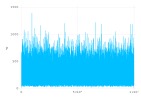

In [36]:
plot(y=κᵤ, Geom.line)

In [37]:
mean(κᵤ)

235.40620194250025

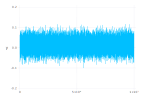

In [38]:
plot(y=μ[1, :], Geom.line)